# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273.15  # Convert Kelvin to Celsius
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saudarkrokur
Processing Record 2 of Set 1 | casa grande
Processing Record 3 of Set 1 | bom jardim
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | el nido
Processing Record 7 of Set 1 | lihue
Processing Record 8 of Set 1 | marka
Processing Record 9 of Set 1 | klyuchi
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | alotau
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | bardai
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | puerto carreno
Processing Record 21 of Set 1 | camabatela
Processing Record 22 of Set 1 | salalah
Processin

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saudarkrokur,65.7461,-19.6394,10.16,71,94,2.77,IS,1724774399
1,casa grande,32.8795,-111.7573,32.77,35,54,2.68,US,1724774400
2,bom jardim,-7.7958,-35.5872,27.94,54,41,7.39,BR,1724774401
3,adamstown,-25.0660,-130.1015,19.70,68,100,9.37,PN,1724774402
4,ribeira grande,38.5167,-28.7000,27.22,47,20,3.09,PT,1724774403


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saudarkrokur,65.7461,-19.6394,10.16,71,94,2.77,IS,1724774399
1,casa grande,32.8795,-111.7573,32.77,35,54,2.68,US,1724774400
2,bom jardim,-7.7958,-35.5872,27.94,54,41,7.39,BR,1724774401
3,adamstown,-25.0660,-130.1015,19.70,68,100,9.37,PN,1724774402
4,ribeira grande,38.5167,-28.7000,27.22,47,20,3.09,PT,1724774403


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

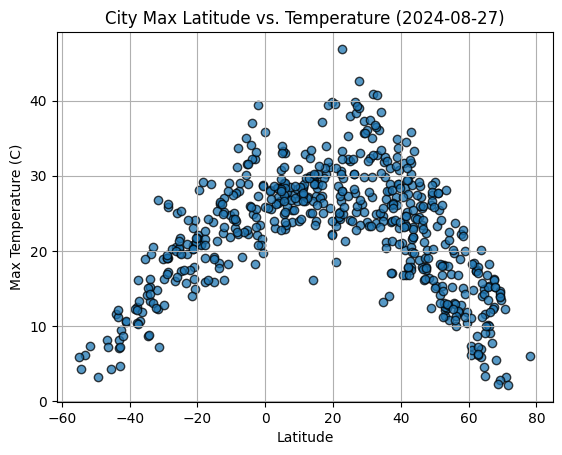

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-08-27)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

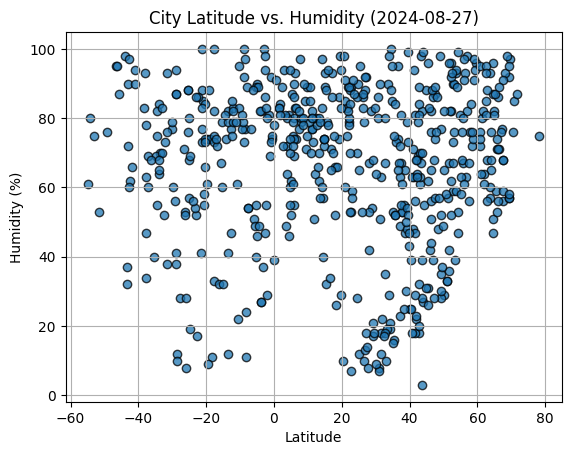

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-08-27)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

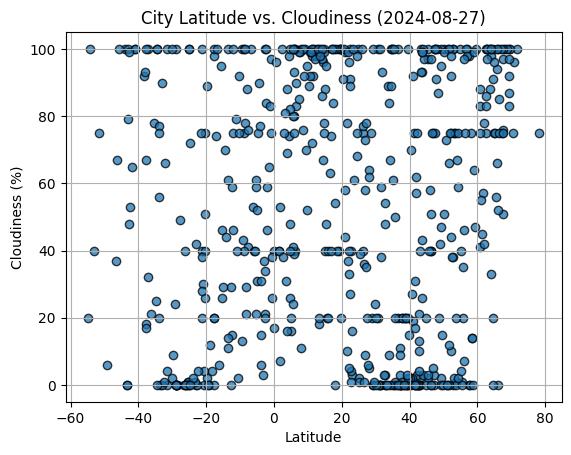

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-08-27)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

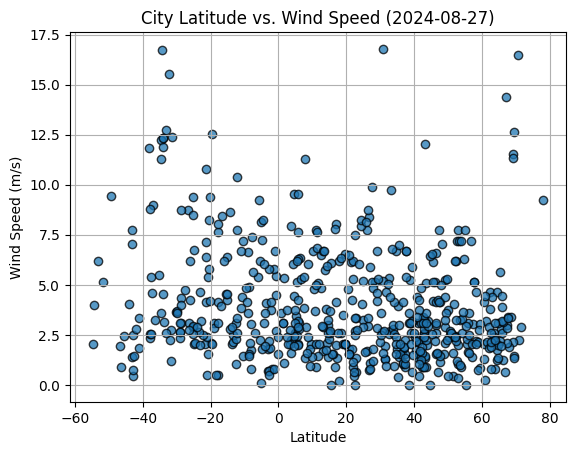

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-08-27)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def create_linear_regression(x_values, y_values, title, x_label, y_label):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=0.75)

    # Add linear regression line
    plt.plot(x_values, slope * x_values + intercept, "r-")

    # Add line equation to plot
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")

    # Incorporate the other graph properties
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.grid(False)

    # Save the figure
    #plt.savefig("output_data/" + title.replace(" ", "_") + ".png")

    #Print the r-squared value
    print("The r^2-value is: ", rvalue**2)

    # Show plot
    plt.show()
    
    

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saudarkrokur,65.7461,-19.6394,10.16,71,94,2.77,IS,1724774399
1,casa grande,32.8795,-111.7573,32.77,35,54,2.68,US,1724774400
4,ribeira grande,38.5167,-28.7000,27.22,47,20,3.09,PT,1724774403
5,el nido,11.1858,119.3956,28.41,77,99,0.89,PH,1724774404
6,lihue,21.9789,-159.3672,24.64,89,37,5.28,US,1724774405


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bom jardim,-7.7958,-35.5872,27.94,54,41,7.39,BR,1724774401
3,adamstown,-25.0660,-130.1015,19.70,68,100,9.37,PN,1724774402
10,port alfred,-33.5906,26.8910,19.54,70,0,3.13,ZA,1724774410
11,alotau,-10.3069,150.4462,21.89,95,92,1.45,PG,1724774411
12,edinburgh of the seven seas,-37.0676,-12.3116,10.63,69,100,8.97,SH,1724774412


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is:  0.456150627781872


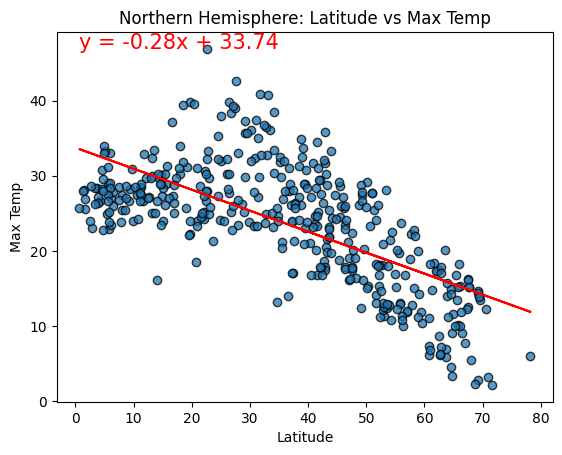

In [39]:
# Linear regression on Northern Hemisphere
create_linear_regression(northern_hemi_df["Lat"], 
                         northern_hemi_df["Max Temp"], 
                         "Northern Hemisphere: Latitude vs Max Temp", 
                         "Latitude", 
                         "Max Temp")

The r^2-value is:  0.6820855647827428


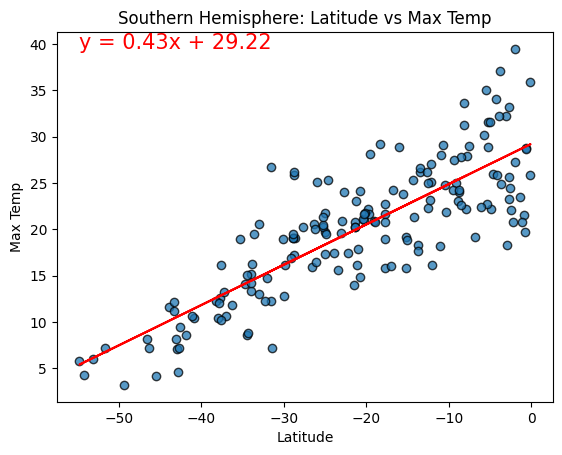

In [40]:
# Linear regression on Southern Hemisphere
create_linear_regression(southern_hemi_df["Lat"], 
                         southern_hemi_df["Max Temp"],
                         "Southern Hemisphere: Latitude vs Max Temp", 
                         "Latitude", 
                         "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In conclusion, the linear regression analysis confirms a significant linear relationship between Max Temp and Latitude. The model does provide a good fit for the data, as indicated by the R-squared value.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is:  0.00026370844345721624


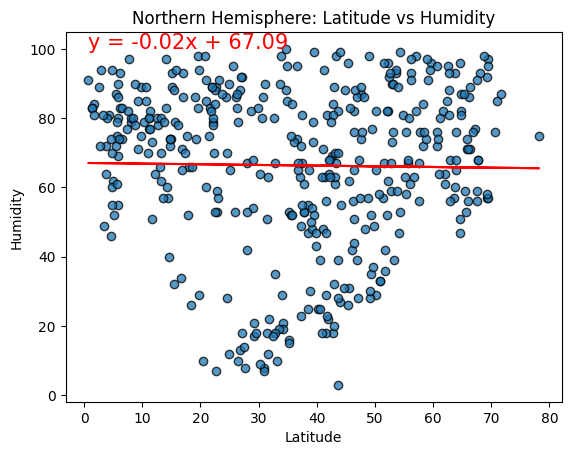

In [41]:
# Northern Hemisphere
create_linear_regression(northern_hemi_df["Lat"], 
                         northern_hemi_df["Humidity"], 
                         "Northern Hemisphere: Latitude vs Humidity", 
                         "Latitude", 
                         "Humidity")

The r^2-value is:  0.00041173760047438725


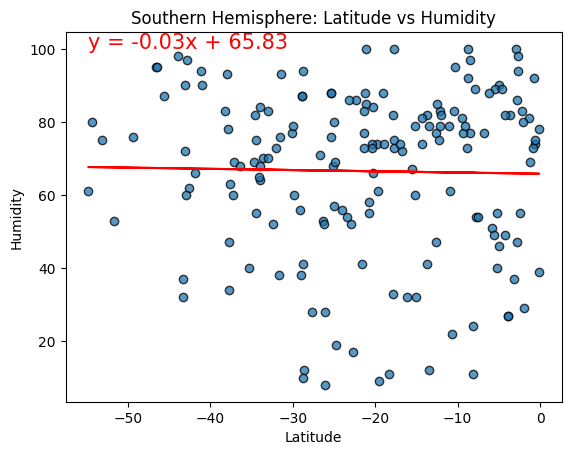

In [42]:
# Southern Hemisphere
create_linear_regression(southern_hemi_df["Lat"], 
                         southern_hemi_df["Humidity"], 
                         "Southern Hemisphere: Latitude vs Humidity", 
                         "Latitude", 
                         "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In conclusion, the linear regression analysis rejects a significant linear relationship between Humidity and Latitude. The model does not provide a good fit for the data, as indicated by the R-squared value.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is:  0.002268172635503859


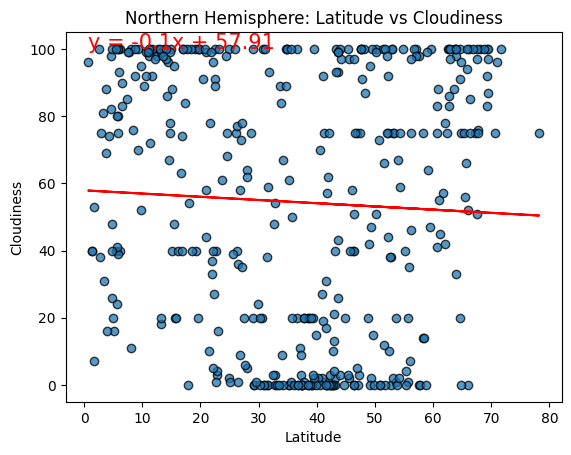

In [43]:
# Northern Hemisphere
create_linear_regression(northern_hemi_df["Lat"], 
                         northern_hemi_df["Cloudiness"],
                         "Northern Hemisphere: Latitude vs Cloudiness", 
                         "Latitude", 
                         "Cloudiness")

The r^2-value is:  8.541817141646422e-05


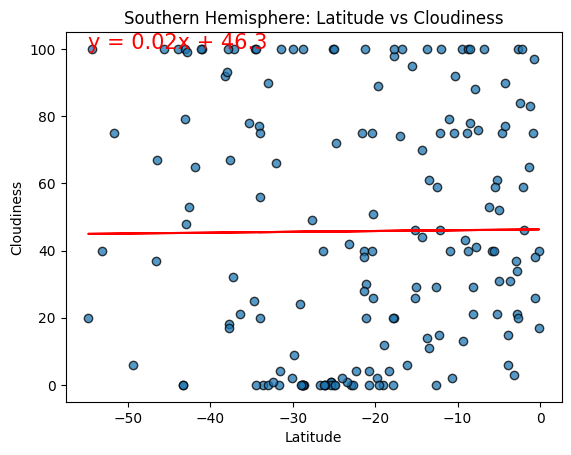

In [44]:
# Southern Hemisphere
create_linear_regression(southern_hemi_df["Lat"], 
                         southern_hemi_df["Cloudiness"], 
                         "Southern Hemisphere: Latitude vs Cloudiness", 
                         "Latitude", 
                         "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In conclusion, the linear regression analysis rejects a significant linear relationship between Cloudiness and Latitude. The model does not provide a good fit for the data, as indicated by the R-squared value.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is:  0.0034137524993117377


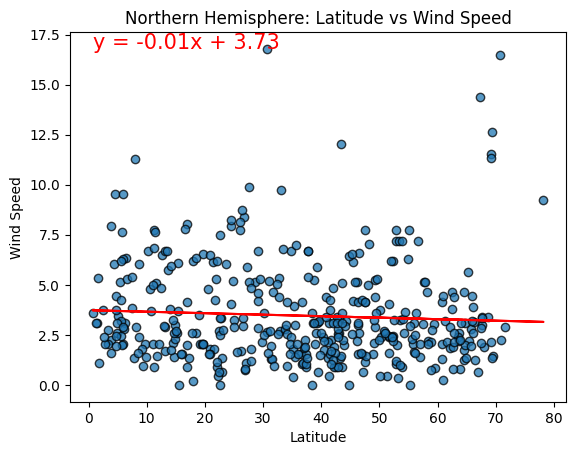

In [45]:
# Northern Hemisphere
create_linear_regression(northern_hemi_df["Lat"], 
                         northern_hemi_df["Wind Speed"],
                         "Northern Hemisphere: Latitude vs Wind Speed", 
                         "Latitude", 
                         "Wind Speed")

The r^2-value is:  0.023478178247008805


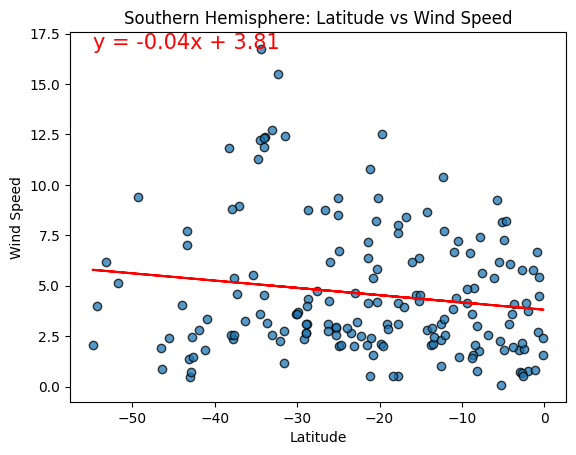

In [46]:
# Southern Hemisphere
create_linear_regression(southern_hemi_df["Lat"], 
                         southern_hemi_df["Wind Speed"], 
                         "Southern Hemisphere: Latitude vs Wind Speed", 
                         "Latitude", 
                         "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In conclusion, the linear regression analysis rejects a significant linear relationship between Wind Speed and Latitude. The model does not provide a good fit for the data, as indicated by the R-squared value.